# Chapter 15. Statistics in Python

In [ ]:
import pandas as pd

## Data representation and interaction

In [ ]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [ ]:
import numpy as np

In [ ]:
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

pd.DataFrame({'t':t, 'sin':sin_t, 'cos':cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


In [ ]:
data.shape

(40, 8)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [ ]:
data['Gender']

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object

In [ ]:
data[data['Gender'] == 'Female']['VIQ'].mean()

np.float64(109.45)

In [ ]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', np.float64(109.45))
('Male', np.float64(115.25))


In [ ]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


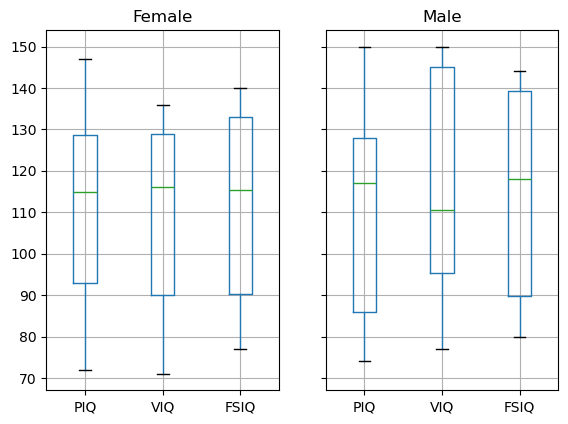

In [ ]:
groupby_gender.boxplot(column=['PIQ', 'VIQ', 'FSIQ']);

In [ ]:
from pandas import plotting

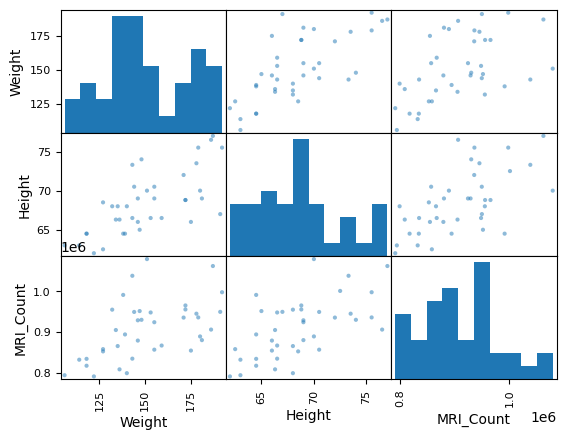

In [ ]:
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']]);

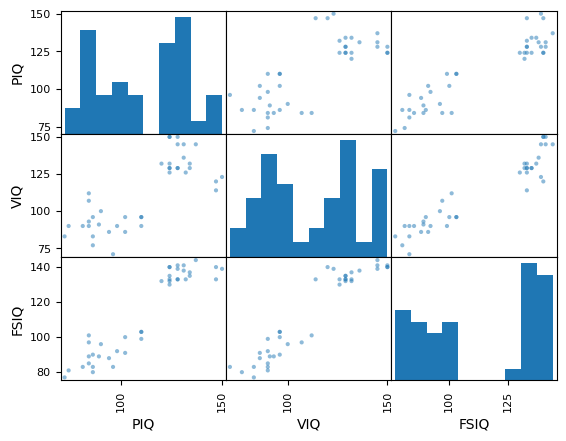

In [ ]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']]);

## Hypothesis testing: comparing two groups

In [ ]:
import scipy as sp

### Student's t-test: the simplest hypothesis test

#### One-sample tests: testing the value of a population mean

`scipy.stats.ttest_1samp()` tests the null hypothesis that the mean of the population underlying the data is equal to a given value. It returns the T statistic, and the p-value.

In [ ]:
sp.stats.ttest_1samp(data['VIQ'], 0)

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727975e-28), df=np.int64(39))

- Null Hypothesis: The mean of data['VIQ'] is 0.
- Test Statistic: 30.0881 (indicates how far the sample mean is from 0, in terms of standard error).
- p-value: 1.33e-28 (very small, strong evidence against the null hypothesis).

Conclusion: Reject the null hypothesis. The mean of data['VIQ'] is significantly different from 0.

The p-value of $10^{-28}$ indicates that such an extreme value of the statistic is unlikely to be observed under the null hypothesis. This may be taken as evidence that the null hypothesis is fale and that the population mean IQ (VIQ measure) is not 0.

Technically, the p-value of the t-test is derived under the assumption that the means of samples drawn from the population are normally distributed.  If we are concerned that violation of the normality assumptions will affect the conclusions of the test, we can use a Wilcoxon signed-rank test, which relaxes this assumption at the expense of test power, `scipy.stats.wilcoxon()`:

In [ ]:
sp.stats.wilcoxon(data['VIQ'])

WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(3.488172636231201e-08))

- Null Hypothesis: The median of data['VIQ'] is 0.
- Test Statistic: 0.0 (sum of signed ranks; indicates all data are far from 0 in the same direction).
- p-value: 3.49e-08 (very small, strong evidence against the null hypothesis).

Conclusion: Reject the null hypothesis. The median of data['VIQ'] is significantly different from 0.

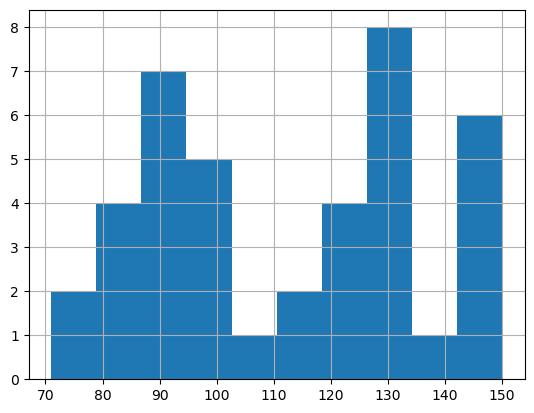

In [ ]:
data["VIQ"].hist();

#### Two-sample t-test: testing for difference across populations

We have seen above that the mean VIQ in the male and female samples were different. To test whether this difference is significant (and suggests that there is a difference in population means), we perform a two-sample t-test using `scipy.stats.ttest_ind()`:

In [ ]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
sp.stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

- Null Hypothesis: The means of male and female VIQ are equal.
- Test Statistic: -0.7726 (indicates the standardized difference between the means of the two groups).
- p-value: 0.4445 (greater than 0.05; not enough evidence to reject the null hypothesis).

Conclusion: Fail to reject the null hypothesis. There is no significant difference in the mean VIQ between males and females.

The corresponding non-parametric test is the Mann–Whitney U test, `scipy.stats.mannwhitneyu()`.

In [ ]:
sp.stats.mannwhitneyu(female_viq, male_viq)

MannwhitneyuResult(statistic=np.float64(164.5), pvalue=np.float64(0.3422886868727315))

- Null Hypothesis: The distributions (or medians) of male and female VIQ are equal.
- Test Statistic: 164.5 (represents the rank-sum comparison between the two groups).
- p-value: 0.3423 (greater than 0.05; not enough evidence to reject the null hypothesis).

Conclusion: Fail to reject the null hypothesis. There is no significant difference in the median VIQ between males and females.

### Paired tests: repeated measurements on the same individuals

PIQ, VIQ, and FSIQ give three measures of IQ. Let us test whether FISQ and PIQ are significantly different. We can use an "independent sample" test, `scipy.stats.ttest_ind()`:

In [ ]:
sp.stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

- Null Hypothesis: The means of FSIQ and PIQ are equal (treated as independent groups).
- Test Statistic: 0.4656 (difference between the means, standardized by standard error).
- p-value: 0.6428 (greater than 0.05; no evidence to reject the null hypothesis).

Conclusion: Fail to reject the null hypothesis. FSIQ and PIQ means are not significantly different (but this test is inappropriate here since the data is paired).

The problem with this approach is that it ignores an important relationship between observations: FSIQ and PIQ are measured on the same individuals. Thus, the variance due to inter-subject variability is confounding, reducing the power of the test. This variability can be removed using a "paired test" or "repeated measures test":

In [ ]:
sp.stats.ttest_rel(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

- Null Hypothesis: The mean difference between FSIQ and PIQ is 0.
- Test Statistic: 1.7842 (indicates the difference's deviation from 0, standardized by standard error).
- p-value: 0.0822 (greater than 0.05; not enough evidence to reject the null hypothesis).

Conclusion: Fail to reject the null hypothesis. There is no significant difference in the means of FSIQ and PIQ.

This is equivalent to a one-sample test on the differences between paired observations:

In [ ]:
sp.stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

- Null Hypothesis: The mean of FSIQ - PIQ is 0.
- Test Statistic: 1.7842 (same as paired t-test).
- p-value: 0.0822 (same as paired t-test).

Conclusion: Fail to reject the null hypothesis. The mean difference between FSIQ and PIQ is not significant.

Accordingly, we can perform a nonparametric version of the test with wilcoxon.

In [ ]:
sp.stats.wilcoxon(data['FSIQ'], data['PIQ'], method="approx")

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

- Null Hypothesis: The distribution of differences (FSIQ - PIQ) is symmetric around 0.
- Test Statistic: 274.5 (sum of signed ranks of differences).
- p-value: 0.1066 (greater than 0.05; not enough evidence to reject the null hypothesis).

Conclusion: Fail to reject the null hypothesis. No significant difference between FSIQ and PIQ distributions.

## Linear models, multiple factors, and analysis of variance

### A simple linear regression

Given two set of observations, x and y, we want to test the hypothesis that y is a linear function of x. In other terms:
$$
y = x * \text{coef} + \text{intercept} + \text{e}
$$
where e is observation noise. 

We will use the statsmodels module to:
1. Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS).
1. Test that coef is non zero.

In [ ]:
import numpy as np
x = np.linspace(-5, 5, 20)
rng = np.random.default_rng(27446968)
# normal distributed noise
y = -5 + 3*x + 4 * rng.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

In [ ]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     164.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.72e-10
Time:                        18:00:39   Log-Likelihood:                -51.758
No. Observations:                  20   AIC:                             107.5
Df Residuals:                      18   BIC:                             109.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2948      0.759     -5.661      0.0

### Categorical variables: comparing groups or multiple categories

In [ ]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")

We can write a comparison between IQ of male and female using a linear model:

In [ ]:
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Tue, 28 Jan 2025   Prob (F-statistic):              0.445
Time:                        18:00:47   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [ ]:
model = ols("VIQ ~ C(Gender)", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Tue, 28 Jan 2025   Prob (F-statistic):              0.445
Time:                        18:01:37   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           109.4500      5.30

In [ ]:
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
data_long

,iq,type
0,133,fsiq
1,140,fsiq
2,139,fsiq
3,133,fsiq
4,137,fsiq
...,...,...
35,128,piq
36,124,piq
37,94,piq
38,74,piq


In [ ]:
model = ols("iq ~ type", data_long).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Tue, 28 Jan 2025   Prob (F-statistic):              0.643
Time:                        18:01:46   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

In [ ]:
sp.stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

## Multiple Regression: including multiple factors

In [ ]:
data = pd.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.58e-20
Time:                        18:05:23   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

## Post-hoc hypothesis testing: analysis of variance (ANOVA)

In [ ]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=3.2453353465741657, p=0.07369058781701222, df_denom=146, df_num=1>


## More visualization: seaborn for statistical exploration

In [ ]:
import os
import requests

if not os.path.exists("wages.txt"):
    # Download the file if it is not present
    r = requests.get("http://lib.stat.cmu.edu/datasets/CPS_85_Wages")
    with open("wages.txt", "wb") as f:
        f.write(r.content)

# Give names to the columns
names = [
    "EDUCATION: Number of years of education",
    "SOUTH: 1=Person lives in South, 0=Person lives elsewhere",
    "SEX: 1=Female, 0=Male",
    "EXPERIENCE: Number of years of work experience",
    "UNION: 1=Union member, 0=Not union member",
    "WAGE: Wage (dollars per hour)",
    "AGE: years",
    "RACE: 1=Other, 2=Hispanic, 3=White",
    "OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other",
    "SECTOR: 0=Other, 1=Manufacturing, 2=Construction",
    "MARR: 0=Unmarried,  1=Married",
]

short_names = [n.split(":")[0] for n in names]

data = pd.read_csv(
    "wages.txt", skiprows=27, skipfooter=6, sep=None, header=None, engine="python"
)
data.columns = pd.Index(short_names)

# Log-transform the wages, because they typically are increased with
# multiplicative factors
import numpy as np

data["WAGE"] = np.log10(data["WAGE"])

In [ ]:
data

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,0.707570,35,2,6,1,1
1,9,0,1,42,0,0.694605,57,3,6,1,1
2,12,0,0,1,0,0.824126,19,3,6,1,0
3,12,0,0,4,0,0.602060,22,3,6,0,0
4,12,0,0,17,0,0.875061,35,3,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
529,18,0,0,5,0,1.055378,29,3,5,0,0
530,12,0,1,33,0,0.785330,51,1,5,0,1
531,17,0,1,25,1,1.366423,48,1,5,0,1
532,12,1,0,13,1,1.298416,31,3,5,0,1


In [ ]:
import seaborn as sns

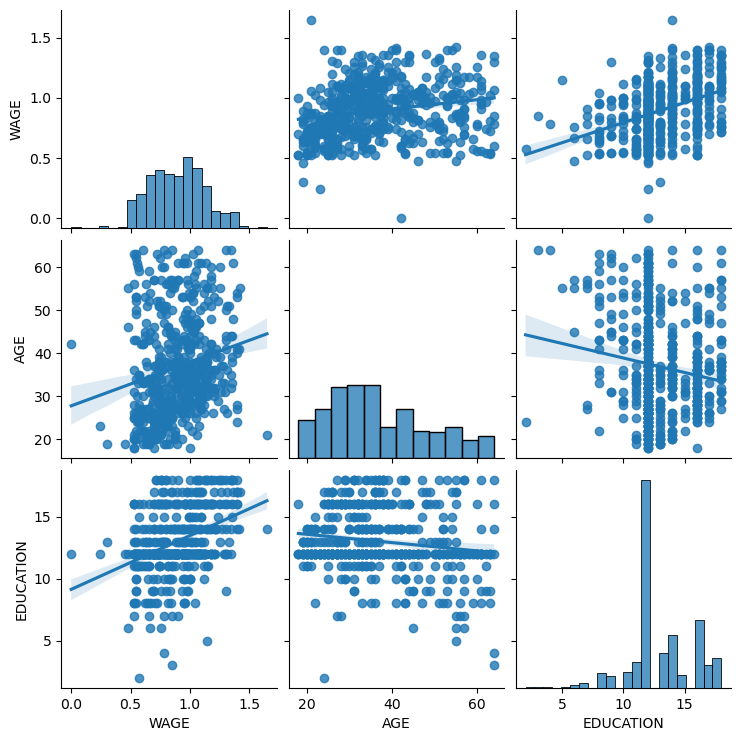

In [ ]:
sns.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], 
             kind='reg'); 

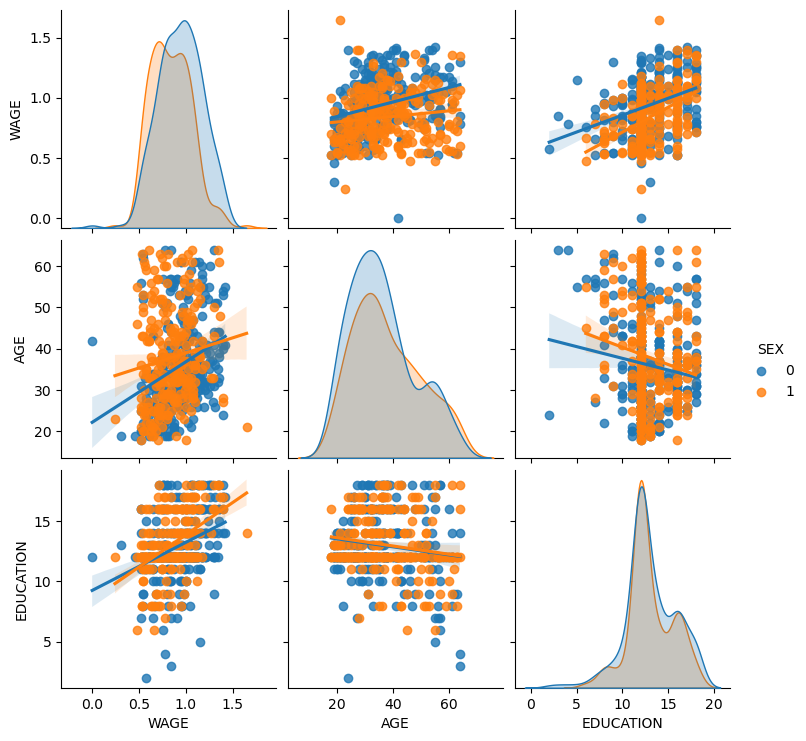

In [ ]:
sns.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], 
             kind='reg', hue='SEX');

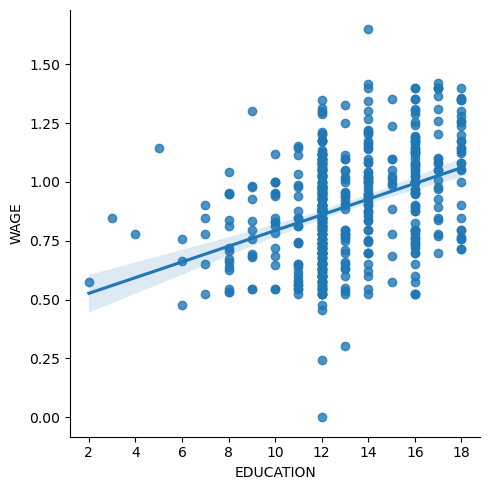

In [ ]:
sns.lmplot(y='WAGE', x='EDUCATION', data=data);

In [ ]:
result = ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX',
             data=data).fit()    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           2.94e-25
Time:                        18:45:16   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861